In [ ]:
#preliminary setup
import torch
import numpy as np
import matplotlib.pyplot as plt
%pip install -r requirements.txt

#Fetching the data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

random_seed = 302
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_seed)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=random_seed, )

  Using cached matplotlib-3.9.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.5.2-cp39-cp39-win_amd64.whl.metadata (13 kB)
  Using cached pandas-2.2.3-cp39-cp39-win_amd64.whl.metadata (19 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following versions that require a different python version: 2.1.0 Requires-Python >=3.10; 2.1.0rc1 Requires-Python >=3.10; 2.1.1 Requires-Python >=3.10; 2.1.2 Requires-Python >=3.10; 2.1.3 Requires-Python >=3.10; 3.10.0rc1 Requires-Python >=3.10
ERROR: Could not find a version that satisfies the requirement numpy==2.1.2 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6, 1.22.0, 1.22.1, 1.22.2, 1.22.3

Training set
size: (13932, 8)
          MedInc   HouseAge   AveRooms   AveBdrms   Population   AveOccup   Latidue   Longitude
mean        0.01       0.01       0.01       0.01        0.01         0.0       0.01      -0.01
 std         0.0        0.0        0.0        0.0        0.01        0.01        0.0        0.0
 min         0.0        0.0        0.0        0.0         0.0         0.0       0.01      -0.01
 max        0.03       0.01        0.2       0.18        0.17        0.86       0.01      -0.01


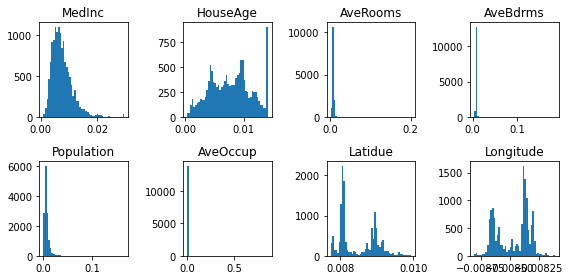

Validation set
size:  (1548, 8)
          MedInc   HouseAge   AveRooms   AveBdrms   Population   AveOccup   Latidue   Longitude
mean        0.02       0.02       0.02       0.02        0.02        0.01       0.03      -0.03
 std        0.01       0.01       0.01       0.01        0.02        0.02        0.0        0.0
 min         0.0        0.0       0.01       0.01         0.0         0.0       0.02      -0.03
 max        0.09       0.04       0.14       0.21        0.23        0.97       0.03      -0.02


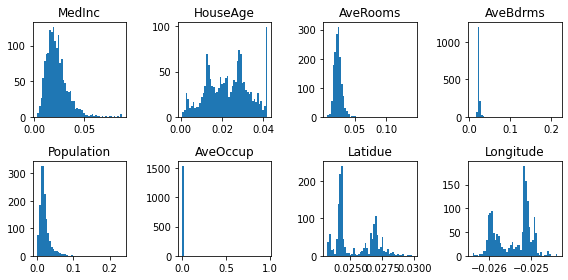

Test set
size:  (5160, 8)
          MedInc   HouseAge   AveRooms   AveBdrms   Population   AveOccup   Latidue   Longitude
mean        0.01       0.01       0.01       0.01        0.01        0.01       0.01      -0.01
 std        0.01       0.01       0.01       0.01        0.01        0.01        0.0        0.0
 min         0.0        0.0        0.0        0.0         0.0         0.0       0.01      -0.01
 max        0.05       0.02        0.3       0.38        0.22        0.35       0.02      -0.01


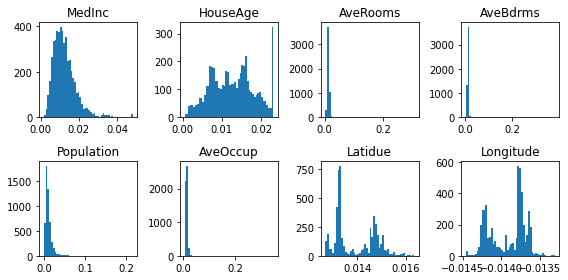

In [ ]:
#a.) Investigating the dataset

all_sets = [X_train,y_train,X_validation,y_validation,X_test,y_test]
all_sets_names = ["Training set","Training targtets","Validation set","Validation targets","Test set","Test targets"]
features = ["MedInc","HouseAge","AveRooms","AveBdrms","Population","AveOccup","Latidue","Longitude"]

#Normalizing data
for i,set in enumerate(all_sets[0::2]):
    for col in range(len(features)):
        norm_feature = normalize(np.reshape(set[:,col],(1,len(set[:,col]))))
        all_sets[i*2][:,col] = norm_feature
#TODO: why do the distributions not look different?

#Checking the data, to see what would be good to normalize
for set, name in zip(all_sets[0::2],all_sets_names[0::2]):
    
    print('\033[4m'+'\033[1m'+f"{name}"+'\033[0m'+'\033[0m')
    print(f"size: {str(set.shape) : >10}")
    stats = {"mean":[],
             "std":[],
             "min":[],
             "max":[]}
    fig,axs = plt.subplots(2,len(features)//2,figsize=(8,4),layout = "tight")
    for col,feature in enumerate(features):
        feature_data = set[:,col]
        stats["mean"].append(np.mean(feature_data))
        stats["std"].append(np.std(feature_data))
        stats["min"].append(np.min(feature_data))
        stats["max"].append(np.max(feature_data))
        axs[int(np.floor(col/4))][(col%4)].hist(feature_data,bins=50)
        axs[int(np.floor(col/4))][(col%4)].set_title(feature)

    print('\033[1m'+"          "+f"{'   '.join(features)}"+'\033[0m')
    for stat,vals in stats.items():
        x = [str(round(val,2)) for val in vals]
        print('{:>4}{:>12s}{:>11s}{:>11s}{:>11s}{:>12s}{:>12s}{:>11s}{:>11s}'.format(stat,x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7]))
    
    
    plt.show()


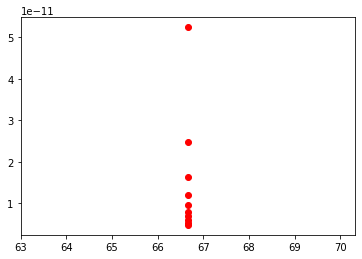

In [14]:
import numpy as np
import matplotlib.pyplot as plt
c = np.linspace(10,20,10)*1-9
Z = -1j/(2*np.pi*5.4e9*c)+37.5
Z = 50*50/Z
plt.figure()
plt.plot(np.real(Z),np.imag(Z),'or')
